In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_test.csv
/kaggle/input/crime-prediction-b1-fall-inter-22-23/sample_submission.csv
/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_train.csv')

test_data = pd.read_csv('/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_test.csv')

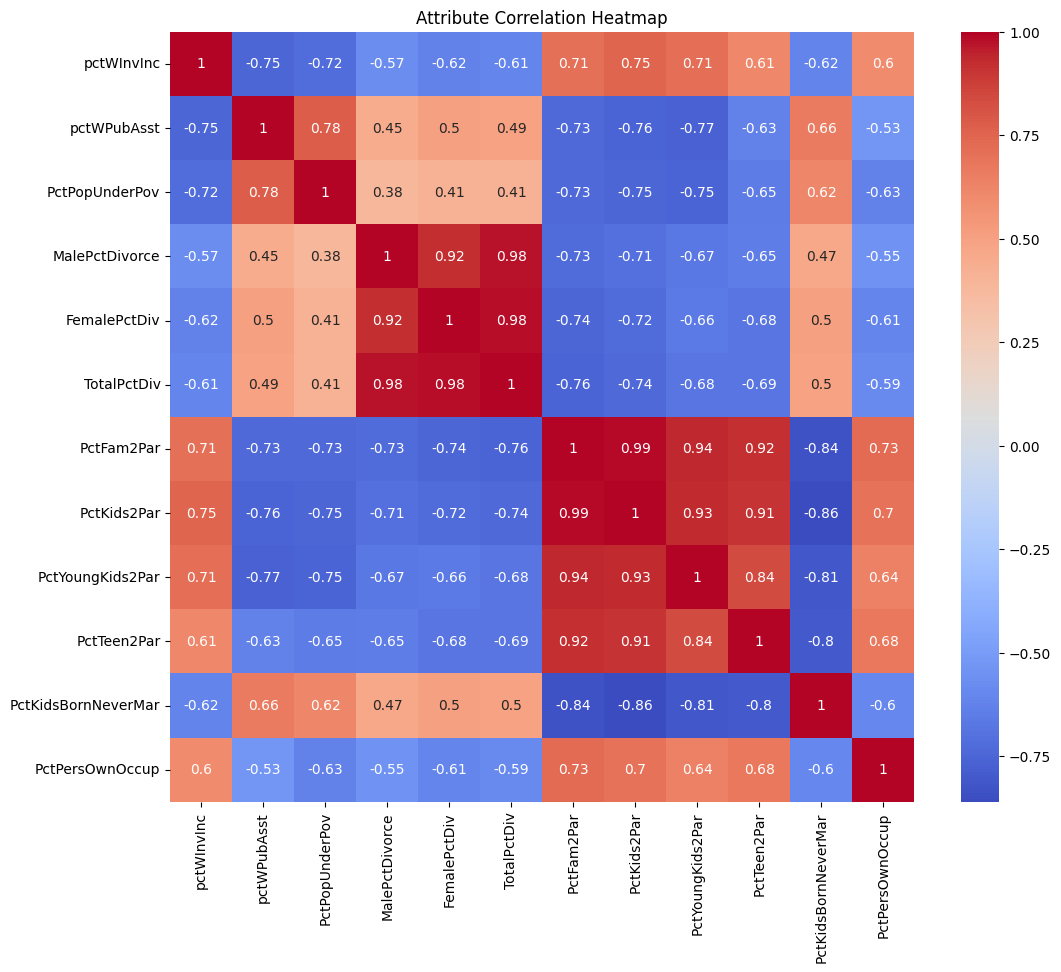

Selected features: ['pctWInvInc', 'pctWPubAsst', 'PctPopUnderPov', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctKidsBornNeverMar', 'PctPersOwnOccup']


In [3]:
data = train_data

X = data.drop(columns=["ViolentCrimesPerPop"])
y = data["ViolentCrimesPerPop"]

# Define the column names
feature_columns = [
    "population", "householdsize", "agePct12t21", "agePct12t29", "agePct16t24",
    "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage",
    "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids",
    "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig",
    "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
    "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous",
    "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc",
    "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
    "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart",
    "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85"
]


threshold = 0.5  

selected_features = []
for column in feature_columns:
    correlation = abs(data[column].corr(y))
    if correlation >= threshold:
        selected_features.append(column)

corr_matrix = data[selected_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Attribute Correlation Heatmap")
plt.show()

print("Selected features:", selected_features)

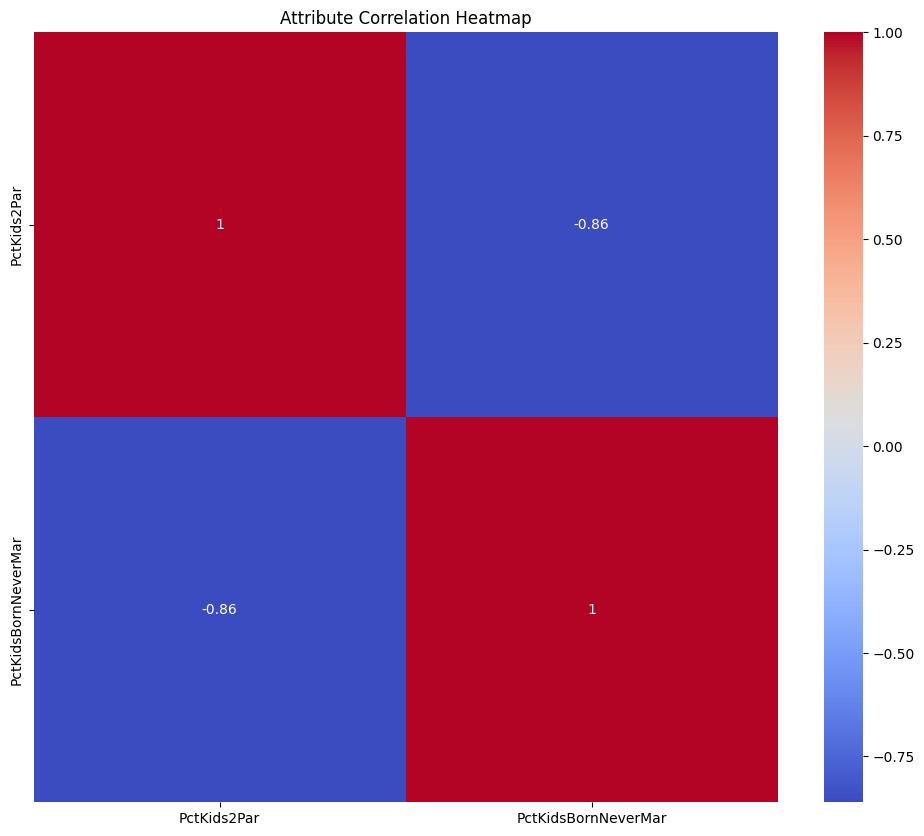

Selected features: ['PctKids2Par', 'PctKidsBornNeverMar']


In [4]:
threshold = 0.7  # Adjust the threshold as desired

selected_features = []
for column in feature_columns:
    correlation = abs(data[column].corr(y))
    if correlation >= threshold:
        selected_features.append(column)

if len(selected_features) == 0:
    print("No features selected based on the correlation threshold.")
else:
    # Calculate the correlation matrix for the selected features
    corr_matrix = data[selected_features].corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Attribute Correlation Heatmap")
    plt.show()

    print("Selected features:", selected_features)

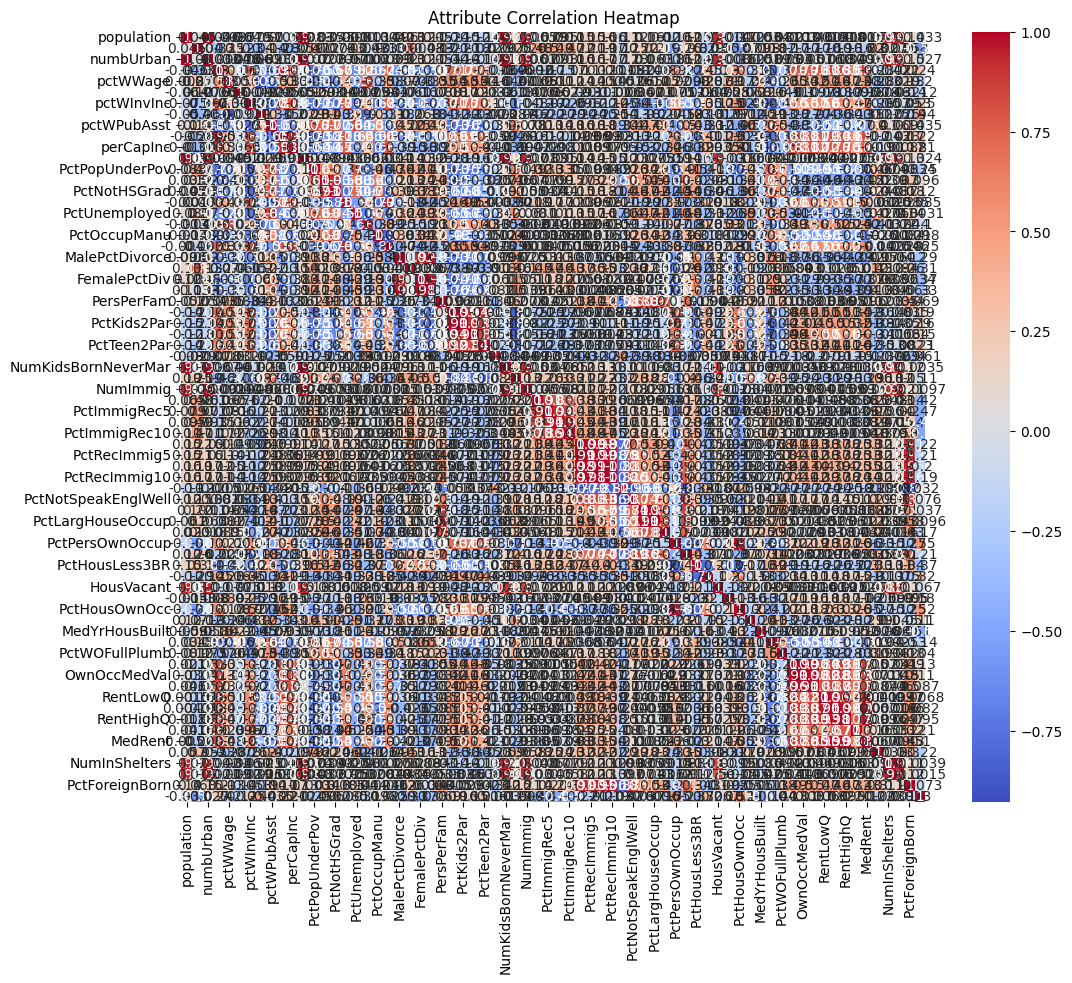

Selected features: ['population', 'agePct12t29', 'numbUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',

In [5]:
threshold = 0.1  # Adjust the threshold as desired

selected_features = []
for column in feature_columns:
    correlation = abs(data[column].corr(y))
    if correlation >= threshold:
        selected_features.append(column)

if len(selected_features) == 0:
    print("No features selected based on the correlation threshold.")
else:
    # Calculate the correlation matrix for the selected features
    corr_matrix = data[selected_features].corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Attribute Correlation Heatmap")
    plt.show()

    print("Selected features:", selected_features)

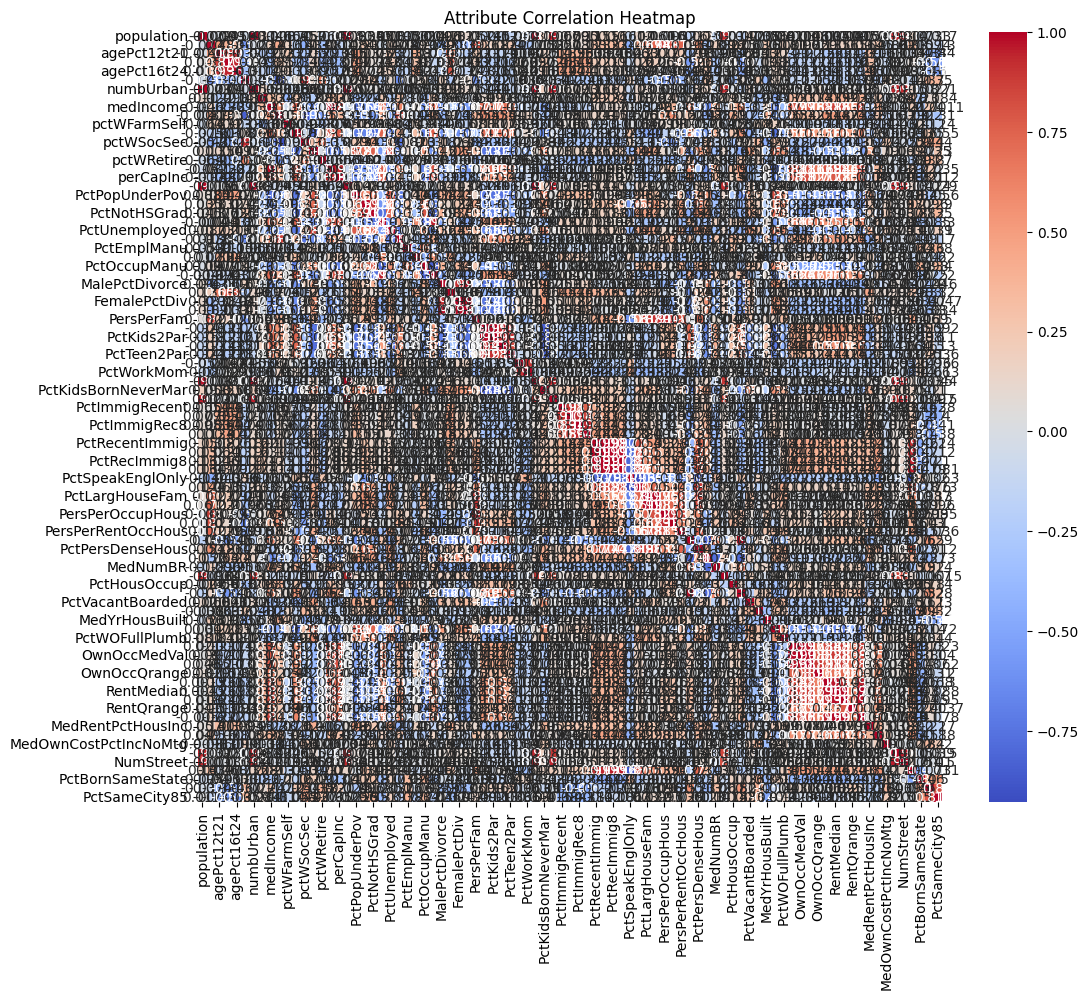

Selected features: ['population', 'householdsize', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',

In [6]:
threshold = 0.005  # Adjust the threshold as desired

selected_features = []
for column in feature_columns:
    correlation = abs(data[column].corr(y))
    if correlation >= threshold:
        selected_features.append(column)

if len(selected_features) == 0:
    print("No features selected based on the correlation threshold.")
else:
    # Calculate the correlation matrix for the selected features
    corr_matrix = data[selected_features].corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Attribute Correlation Heatmap")
    plt.show()

    print("Selected features:", selected_features)

In [7]:
selected_attributes =[
    "population", "householdsize", "agePct12t21", "agePct12t29", "agePct16t24",
    "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage",
    "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids",
    "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig",
    "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
    "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous",
    "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc",
    "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
    "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart",
    "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85"
]
X_train = train_data[selected_attributes]
y_train = train_data['ViolentCrimesPerPop']

X_test = test_data[selected_attributes]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

test_data['Prediction'] = y_pred

y_train_pred = model.predict(X_train_scaled)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_train, y_train_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE Score:", rmse)

RMSE Score: 354.6109622573772


In [8]:
selected_attributes = [
    "population", "householdsize", "agePct12t21", "agePct12t29", "agePct16t24",
    "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage",
    "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids",
    "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig",
    "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
    "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous",
    "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc",
    "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
    "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart",
    "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85"
]

# Feature Engineering
X_train = train_data[selected_attributes]
X_train['log_population'] = np.log(X_train['population'])

X_test = test_data[selected_attributes]
X_test['log_population'] = np.log(X_test['population'])

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare the target variable
y_train = train_data['ViolentCrimesPerPop']

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
mse = mean_squared_error(y_train, model.predict(X_train_scaled))
rmse = np.sqrt(mse)
print("RMSE Score:", rmse)

RMSE Score: 352.10849293436917


/tmp/ipykernel_20/3510579242.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['log_population'] = np.log(X_train['population'])
/tmp/ipykernel_20/3510579242.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['log_population'] = np.log(X_test['population'])


In [9]:
test_data.to_csv('/kaggle/working/submission_21BAI1087.csv', columns=['ID', 'Prediction'], index=False)
print("DONE")

DONE


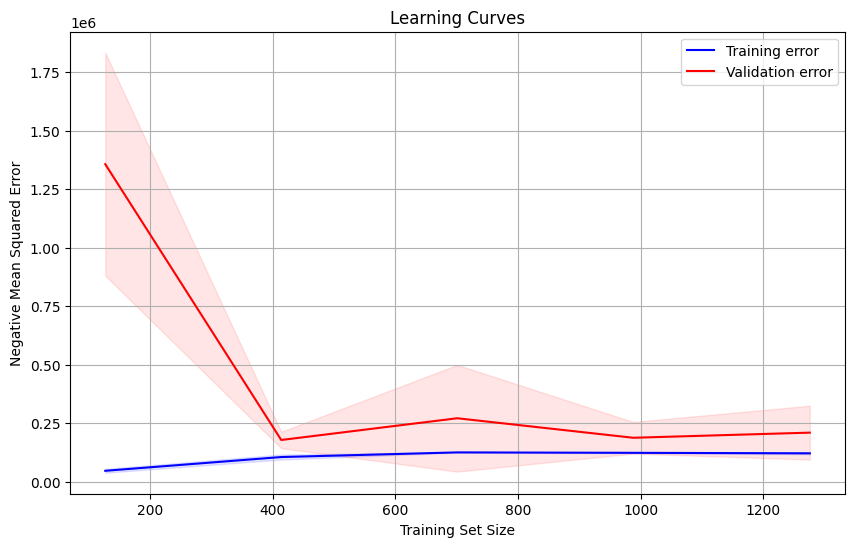

In [10]:
model = LinearRegression()

# Define the training sizes for the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation error', color='red')

# Plot the shaded area representing the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='red')

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()
